In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

# data preprocessing

 First let's load the dataset and add a binary affair column

In [16]:
#load dataset
dta=sm.datasets.fair.load_pandas().data
dta.to_csv('affair.csv')
# dta.head(20)
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
dta.to_csv('affair12.csv')


# data exploration

In [17]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [18]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


 an increase in age, yrs_married and children appears to correlate with a declining marriage rating

# DATA VISUALIZATION

In [19]:
#show plots in the notebook
%matplotlib inline

Let's start with histograms of education and marriage rating

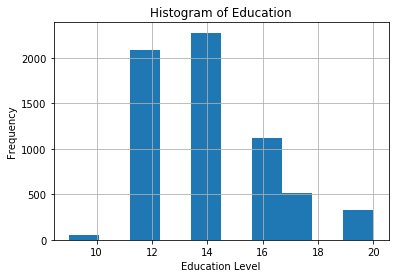

In [20]:
#histogram of education
dta.educ.hist() #dta is dataframe.. educ is column name and hist is ot create histogram
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

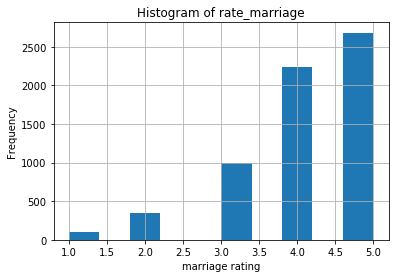

In [21]:
dta.rate_marriage.hist()
plt.title('Histogram of rate_marriage')
plt.xlabel('marriage rating')
plt.ylabel('Frequency')

lets take a look at the distribution of marriage ratings for those having affairs varsus those not having affairs

affair         False  True 
rate_marriage              
1.0               25     74
2.0              127    221
3.0              446    547
4.0             1518    724
5.0             2197    487


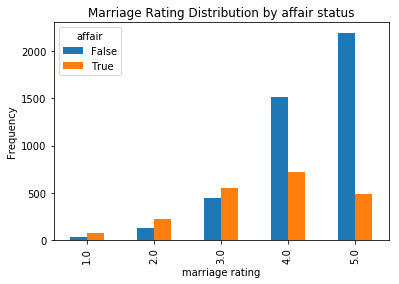

In [25]:
#barplot of marriage rating grouped by affair (True or False)
print(pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)))
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar') #cross tab will create table in rate_marriage of affair ki true kitne h false kitne #alag se run krke dkhlo pta chl jayga kya h ye
plt.title('Marriage Rating Distribution by affair status')
plt.xlabel('marriage rating')
plt.ylabel('Frequency')

Lets use a stacked barplot to look at the percentage of women having affairs by number of years of marriage

affair       False  True 
yrs_married              
0.5            354     16
2.5           1595    439
6.0            754    387
9.0            348    254
13.0           347    243
16.5           449    369
23.0           466    345


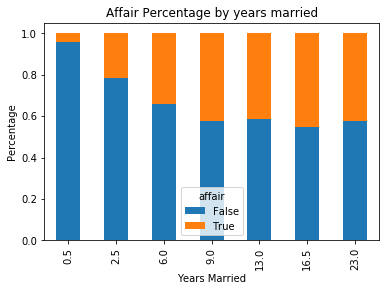

In [28]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
print(affair_yrs_married)
#print(affair_yrs_married.sum(1).astype(float))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True) #individual columns ka sum krke ratio form me krdia 
plt.title('Affair Percentage by years married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

# Prepare data for logistic regression

to prepare the data, i want to add an intercept column as well as dummy variables for occupation and occupation_husb, since i'm treating them as categorial variables. The dmatrices function from the patsy module can do that using formula language.

In [30]:
#Create dataframes with a intercept column and dummy variables for occupation and occupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',dta,return_type="dataframe")
#affair jaara h y me and baaki sb jaare h(sbka concat) X me in data frame matrices form.. ~ is the seperation between two
#C is used for categorial data
#dta is kya dataframe pass kra hai and return_type bhi dataframe hi chahiye
print(X.columns)

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


we need to flatten y into 1-d array , so that scikit-learn will properly understand it as the responce variable

In [19]:
#flatten y into a 1-d array
print(type(y))
print(y)
y=np.ravel(y) #to convert into numpy array
print(type(y))
print(y)

<class 'pandas.core.frame.DataFrame'>
      affair
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
...      ...
6336     0.0
6337     0.0
6338     0.0
6339     0.0
6340     0.0
6341     0.0
6342     0.0
6343     0.0
6344     0.0
6345     0.0
6346     0.0
6347     0.0
6348     0.0
6349     0.0
6350     0.0
6351     0.0
6352     0.0
6353     0.0
6354     0.0
6355     0.0
6356     0.0
6357     0.0
6358     0.0
6359     0.0
6360     0.0
6361     0.0
6362     0.0
6363     0.0
6364     0.0
6365     0.0

[6366 rows x 1 columns]
<class 'numpy.ndarray'>
[ 1.  1.  1. ...,  0.  0.  0.]


# Logistic Regression

lets go ahead and run logistic regression on the entire data set, and see how accurate it is!

In [20]:
#instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X,y)

#check the accuracy on the training set
model.score(X,y)

0.72588752748978946

73% accuracy seems good. but what's the null error rate?

In [21]:
#what percentage had affairs?
y.mean()

0.32249450204209867

only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting 'no'. So we're doing better that the null error rate, but not by much

# Model Evaluation using a validation set

So far, we have trained and tested on the same set. Lets instead split the data into a training set and a testing set.

In [22]:
#evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now we need to predict class labels for the test set. We will also generate the class probability for the test set.

In [23]:
#predict class labels for the test case
predicted = model2.predict(X_test)
print((predicted))

[ 1.  0.  0. ...,  0.  0.  0.]


In [24]:
#generate class probabilities 
probs = model2.predict_proba(X_test) #[prob of not happening and then prob of happening]
print(probs)

[[ 0.3514634   0.6485366 ]
 [ 0.90955084  0.09044916]
 [ 0.72567333  0.27432667]
 ..., 
 [ 0.55727385  0.44272615]
 [ 0.81207043  0.18792957]
 [ 0.74734601  0.25265399]]


classifier is predicting as 1 when it is greater than 0.5 of happening

In [26]:
#generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))

#Compute Area under the reciever Operating Characteristic Curve (ROC AUC) from prediction scores.

print(metrics.roc_auc_score(y_test,probs[:,1])) #prob ke hisaab se score [:,1] matlab y_test ko compare krna h with 2nd column of the matrix

0.729842931937
0.745950606951


The accuracy is 73%, which is the same as we experienced when training and predicting on the same data
we can also see the confusion matrix and a classification report with other metrics.

In [27]:
print(metrics.confusion_matrix(y_test, predicted))

[[1169  134]
 [ 382  225]]


# Model Evaluation Using Cross-Validation

Now lets try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [29]:
#evaluate the model using 10-fold cross-validation ( matlab 10 times iterations.. bar bar chk kraane data ke lie)
scores = cross_val_score(LogisticRegression(),X, y, scoring='accuracy',cv=10) #cv is cross validate
print(scores)
print('------------------------')
print(scores.mean())

[ 0.72100313  0.70219436  0.73824451  0.70597484  0.70597484  0.72955975
  0.7327044   0.70440252  0.75157233  0.75      ]
------------------------
0.724163068551


looks good. its still performing at 73% accuracy

# predicting the Probability of an Affair

Just for fun, Lets predict the probability of an affair for a random woman not present in the dataset.
She's a 25-year-old teacher who graduated college, has been married for 3 years, has one child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.

In [30]:
model.predict_proba(np.array([1,0,0,1,0,0,1,0,0,0,0,3,25,3,1,4,16]).reshape(1,-1)) #probability me

array([[ 0.77472221,  0.22527779]])

In [31]:
model.predict(np.array([1,0,0,1,0,0,1,0,0,0,0,3,25,3,1,4,16]).reshape(1,-1)) #aise hi

array([ 0.])

the predictied probability of an affair is 23%